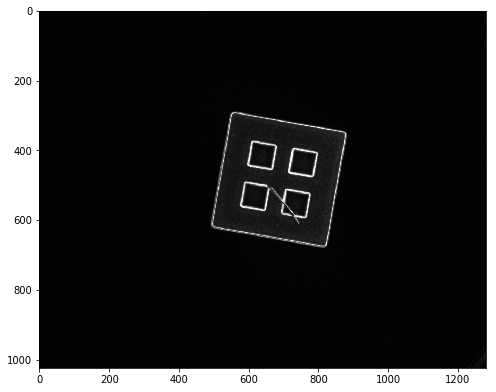

In [5]:
from skimage import filters,io,color,morphology,feature,measure,transform
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np
import cv2

img0=io.imread('./doorknob_01.png',as_grey=True)
img=io.imread('./doorknob_10.png',as_grey=True)
img_copy = img.copy()
plt.subplots(figsize=(8,8))
# io.imshow(img)

# plt.imshow(img0,plt.cm.gray)
plt.imshow(img,plt.cm.gray)
plt.show()

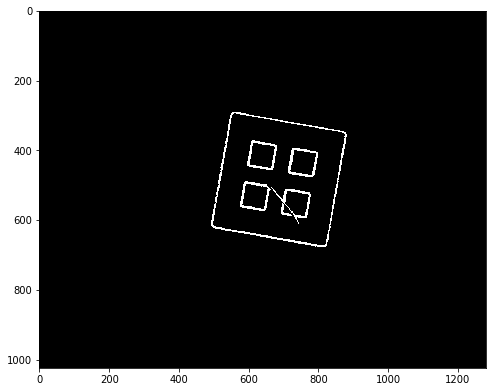

In [6]:
#阈值
_ret, _threshold_image  = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplots(figsize=(8,8))
plt.imshow(_threshold_image,plt.cm.gray)

# contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
# cv2.drawContours(img,contours,-1,(0,0,255),3) 

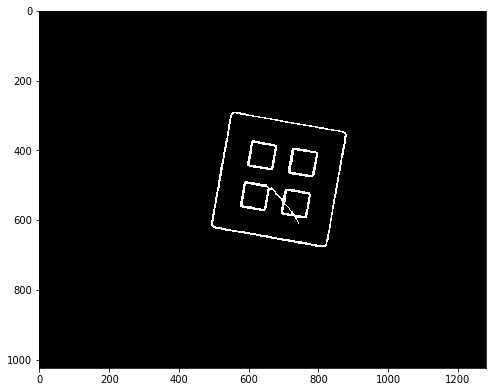

In [50]:
#closing
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5)) 
closed_img = cv2.morphologyEx(_threshold_image, cv2.MORPH_CLOSE, kernel) 
plt.subplots(figsize=(8,8))
plt.imshow(closed_img,plt.cm.gray)
plt.show()

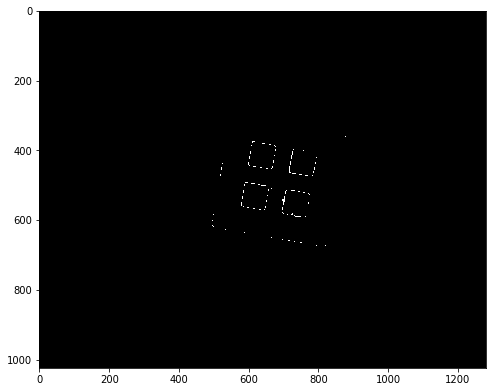

In [21]:
img_, contours, _ = cv2.findContours(closed_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
cv2.drawContours(img_,contours,-1,(0,0,255),3)  
plt.subplots(figsize=(8,8))
plt.imshow(img_,plt.cm.gray)
plt.show()

In [44]:
contours
# plt.subplots(figsize=(8,8))
# plt.imshow(approx,plt.cm.gray)
# plt.show()


[array([[[561, 291]],
 
        [[560, 292]],
 
        [[555, 292]],
 
        [[554, 293]],
 
        [[553, 293]],
 
        [[550, 296]],
 
        [[550, 297]],
 
        [[549, 298]],
 
        [[549, 299]],
 
        [[547, 301]],
 
        [[547, 306]],
 
        [[546, 307]],
 
        [[546, 310]],
 
        [[545, 311]],
 
        [[545, 314]],
 
        [[544, 315]],
 
        [[544, 320]],
 
        [[543, 321]],
 
        [[543, 325]],
 
        [[542, 326]],
 
        [[542, 332]],
 
        [[541, 333]],
 
        [[541, 336]],
 
        [[540, 337]],
 
        [[540, 345]],
 
        [[539, 346]],
 
        [[539, 350]],
 
        [[538, 351]],
 
        [[538, 358]],
 
        [[537, 359]],
 
        [[537, 364]],
 
        [[536, 365]],
 
        [[536, 367]],
 
        [[535, 368]],
 
        [[535, 373]],
 
        [[534, 374]],
 
        [[534, 377]],
 
        [[533, 378]],
 
        [[533, 384]],
 
        [[532, 385]],
 
        [[532, 391]],
 
        [[531, 3

In [47]:
rect = cv2.minAreaRect(contours[0]) 
print(rect[2])

-79.83979797363281


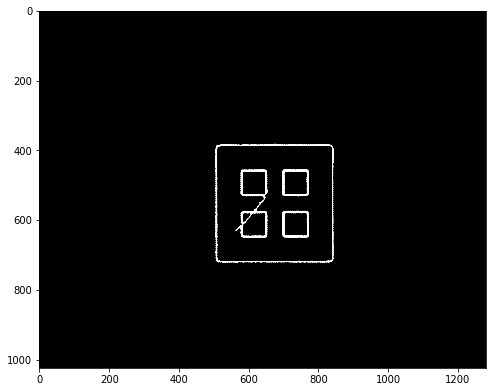

In [53]:
img2 =transform.rotate(closed_img, rect[2])
plt.subplots(figsize=(8,8))
plt.imshow(img2,plt.cm.gray)
plt.show()

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


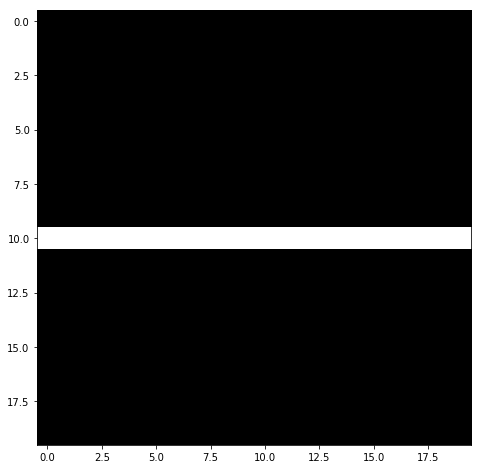

In [240]:
NpKernel = np.uint8(np.zeros((20,20)))  
for i in range(20):  
    NpKernel[10, i] = 1  
#     NpKernel[i, 2] = 1  

print(NpKernel)
plt.subplots(figsize=(8,8))
plt.imshow(NpKernel,plt.cm.gray)
plt.show()

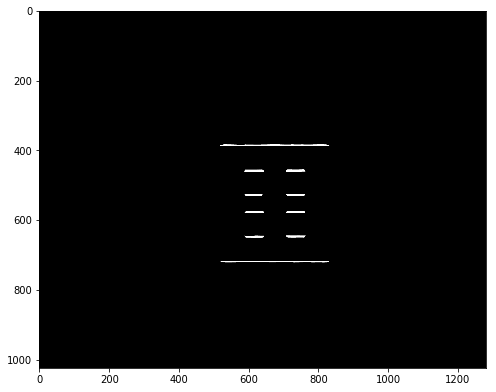

In [81]:
# element = cv2.getStructuringElement(cv2.MORPH_CROSS,NpKernel)  

eroded_1 = cv2.erode(img2,NpKernel) 
plt.subplots(figsize=(8,8))
plt.imshow(eroded_1,plt.cm.gray)
plt.show()

[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


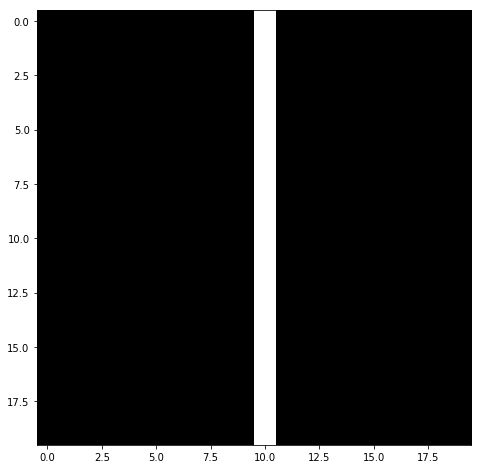

In [239]:
NpKernel_2 = np.uint8(np.zeros((20,20)))  
for i in range(20):  
    NpKernel_2[i, 10] = 1  
#     NpKernel[i, 2] = 1  

print(NpKernel_2)
plt.subplots(figsize=(8,8))
plt.imshow(NpKernel_2,plt.cm.gray)
plt.show()

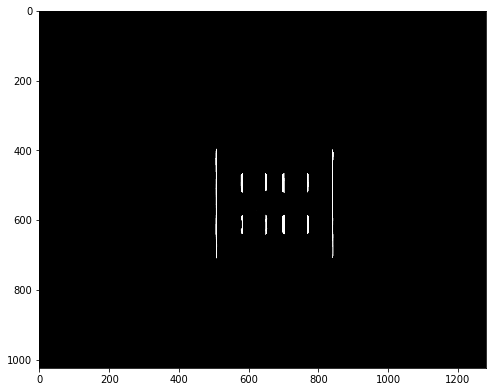

In [79]:
eroded_2 = cv2.erode(img2,NpKernel_2) 
plt.subplots(figsize=(8,8))
plt.imshow(eroded_2,plt.cm.gray)
plt.show()

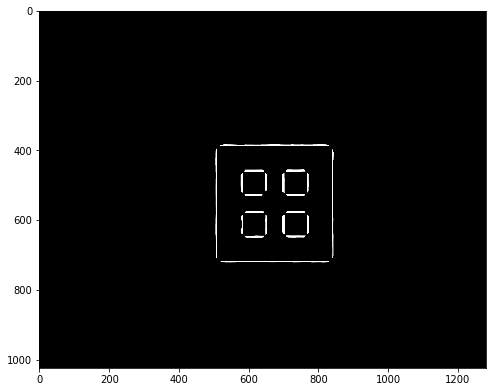

In [82]:
org_img = eroded_1 + eroded_2
plt.subplots(figsize=(8,8))
plt.imshow(org_img,plt.cm.gray)
plt.show()

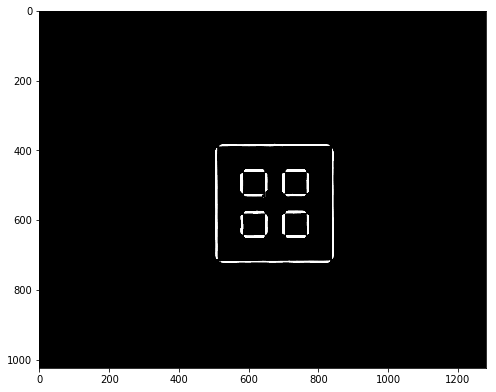

In [87]:
kernel_3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
dilated_1 = cv2.dilate(org_img,kernel_3) 
plt.subplots(figsize=(8,8))
plt.imshow(dilated_1,plt.cm.gray)
plt.show()

In [98]:
NpKernel_4 = np.uint8(np.zeros((3,3)))  
for i in range(3):  
    NpKernel_4[1, i] = 1 
#     NpKernel_[i, 5] = 1 

NpKernel_5 = np.uint8(np.zeros((3,3)))  
for i in range(3):  
#     NpKernel_5[5, i] = 1 
    NpKernel_5[i, 1] = 1 

print(NpKernel_4)
print(NpKernel_5)

[[0 0 0]
 [1 1 1]
 [0 0 0]]
[[0 1 0]
 [0 1 0]
 [0 1 0]]


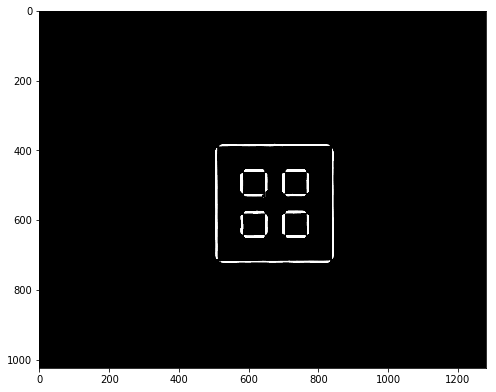

In [99]:
dilated_1 = cv2.dilate(org_img,NpKernel_4) 
dilated_2 = cv2.dilate(dilated_1,NpKernel_5) 

plt.subplots(figsize=(8,8))
plt.imshow(dilated_2,plt.cm.gray)
plt.show()

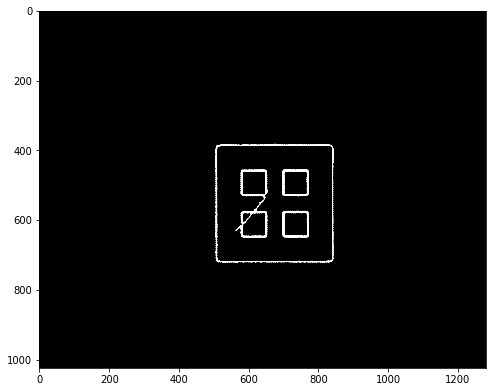

In [97]:
plt.subplots(figsize=(8,8))
plt.imshow(img2,plt.cm.gray)
plt.show()

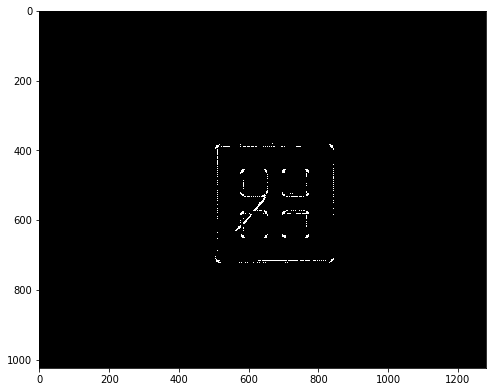

In [107]:
after_img = (img2>0) ^ (dilated_2>0)
plt.subplots(figsize=(8,8))
plt.imshow(after_img*1,plt.cm.gray)
plt.show()

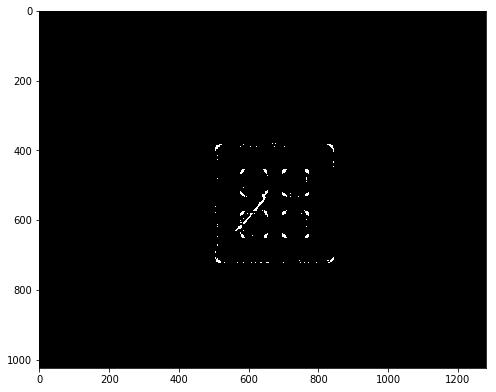

In [142]:
after_img = ((img2-dilated_2)>0)*1
plt.subplots(figsize=(8,8))
plt.imshow(after_img,plt.cm.gray)
plt.show()

In [143]:
after_img.astype('uint8')
print(after_img.max())
print(after_img.dtype)
print(_threshold_image.dtype)

1
int64
uint8


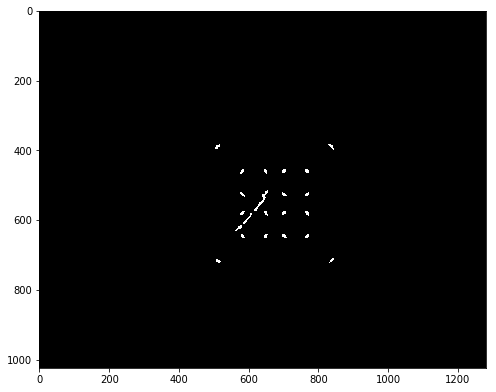

In [163]:
kernel_6 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# closed_after_img = cv2.morphologyEx(after_img.astype('uint8'), cv2.MORPH_CLOSE, kernel_6) 
dilated_1 = cv2.erode(after_img.astype('uint8'),kernel_6) 
dilated_1 = cv2.dilate(dilated_1.astype('uint8'),kernel_6) 
plt.subplots(figsize=(8,8))
plt.imshow(dilated_1,plt.cm.gray)
plt.show()

In [210]:
def find_target_contour(src):
    """ This is a target_contour find function, for given src and a preset threshold,
        find the outer contour of this src image,method is to get the contour which area
        is bigger than half of the src

    :param: Input: the src image {np.array((width,height))}
    :return: contour list-like shape=[[x1,y1],[x2,y2]...] list for contour,
            which is designated by cv2.findContours method
    """

    # find contours interface by cv2
    img, contours, _ = cv2.findContours(src,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    plt.subplots(figsize=(8,8))
    plt.imshow(img,plt.cm.gray)
    # find the target contour by area set
    target_contour = np.array([])
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]    
    
#     # if show:
#     #     # picture for draw result
    total = np.zeros_like(src)
    for contour in contours:
        if cv2.contourArea(contour)> 100:
            imgd = cv2.drawContours(total, contour, -1, 255, 10)
    plt.subplots(figsize=(8,8))
    plt.imshow(total, 'gray')
    plt.show()

    return total,imgd

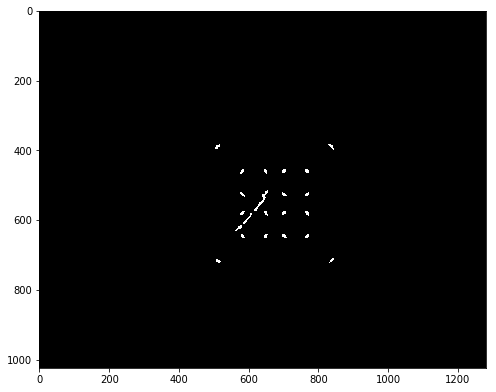

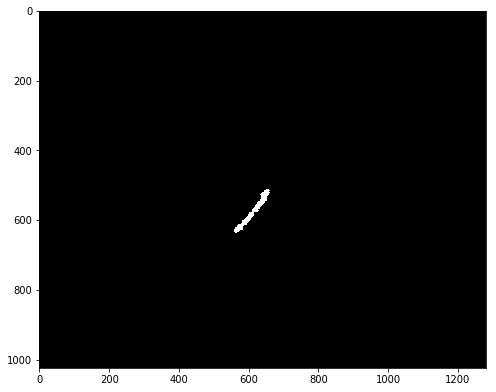

In [211]:
total,imgd  = find_target_contour(dilated_1)

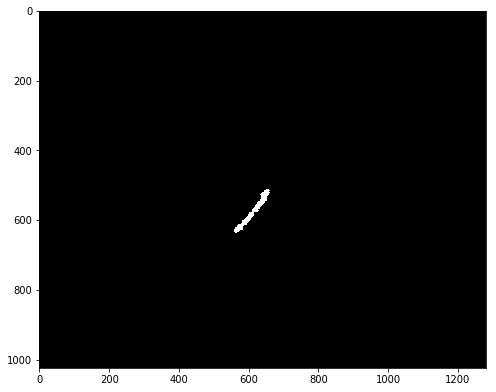

In [212]:
plt.subplots(figsize=(8,8))
plt.imshow(total, 'gray')
plt.show()

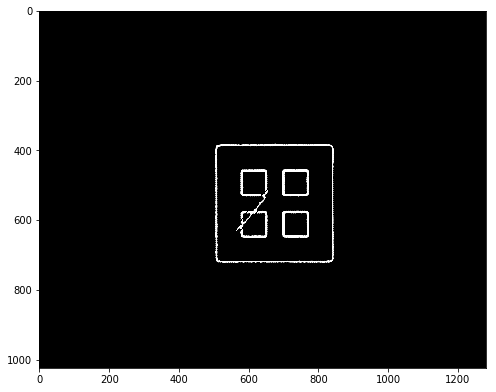

In [238]:
img_2, contours_2, _ = cv2.findContours(imgd,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours_2]
biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

# rect = cv2.minAreaRect(biggest_contour)

# print(rect）
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# print(box)

ellipse = cv2.fitEllipse(biggest_contour)
new_img = cv2.ellipse(img2,ellipse,(0,255,0),2)

# new_img = cv2.rectangle(img, (85,114),(107,98) ,(0,255,0), 2)
plt.subplots(figsize=(8,8))
plt.imshow(new_img,'gray')
plt.show()
